Assignment 1    County Health Ranking: KNN

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the dataset

county = pd.read_csv("Low_High_county_22.csv")

county.shape

(1941, 22)

In [ ]:
county.head()

,CountyFIPS,Length,CountyFIPS_Final,% below 18 years of age raw value,State FIPS Code,Diabetes prevalence raw value,Unemployment raw value,% rural raw value,Adult obesity raw value,Adult smoking raw value,...,Life_Expectancy_3Cat,Life_Expectancy_2Cat,Median household income raw value,Physical inactivity raw value,Population raw value,Uninsured raw value,Cat_Unemploy,Cat_pop,Cat_Income,Life expectancy raw value
0,1000,4,1000,0.220924,1,0.122,0.058770,0.409632,0.363,0.210927,...,Low,Low,53958.0,0.308,4921532,0.115995,Low Unemployment,V Large,50-60k,74.835949
1,1005,4,1005,0.204726,1,0.165,0.070455,0.677896,0.404,0.278000,...,Low,Low,38866.0,0.416,24589,0.129915,High Unemployment,Small-Medium,<50k,72.867210
2,1007,4,1007,0.199946,1,0.127,0.066319,0.683526,0.412,0.252000,...,Low,Low,50907.0,0.377,22136,0.109932,High Unemployment,Small-Medium,50-60k,73.609363
3,1009,4,1009,0.228027,1,0.114,0.040874,0.899515,0.387,0.222000,...,Low,Low,55203.0,0.333,57879,0.142710,Low Unemployment,Large,50-60k,74.171463
4,1011,4,1011,0.208200,1,0.178,0.055002,0.513744,0.438,0.252000,...,Low,Low,33124.0,0.413,9976,0.110996,Low Unemployment,Small-Medium,<50k,73.814682


In [ ]:
# --------------------------------------------------
# Subset the dataframe
# --------------------------------------------------

county_subset = county.loc[:,['CountyFIPS_Final' ,
                       '% below 18 years of age raw value',
                        'Diabetes prevalence raw value',
                       'Unemployment raw value',
                       '% rural raw value',
                       'Adult obesity raw value',
                              'Adult smoking raw value',
                        'Life_Expectancy_2Cat',
                       'Median household income raw value',
                              'Physical inactivity raw value',
                              'Population raw value',
                              'Uninsured raw value', 'Cat_pop', 'Cat_Income']]

county_subset.head()

county_subset.shape

(1941, 14)

In [ ]:
county_subset.dtypes

CountyFIPS_Final                       int64
% below 18 years of age raw value    float64
Diabetes prevalence raw value        float64
Unemployment raw value               float64
% rural raw value                    float64
Adult obesity raw value              float64
Adult smoking raw value              float64
Life_Expectancy_2Cat                  object
Median household income raw value    float64
Physical inactivity raw value        float64
Population raw value                   int64
Uninsured raw value                  float64
Cat_pop                               object
Cat_Income                            object
dtype: object

In [ ]:
# check NAs
missing_values_per_col = county_subset.isna().sum()
print(missing_values_per_col)

CountyFIPS_Final                     0
% below 18 years of age raw value    0
Diabetes prevalence raw value        0
Unemployment raw value               0
% rural raw value                    5
Adult obesity raw value              0
Adult smoking raw value              0
Life_Expectancy_2Cat                 0
Median household income raw value    1
Physical inactivity raw value        0
Population raw value                 0
Uninsured raw value                  0
Cat_pop                              6
Cat_Income                           1
dtype: int64


In [ ]:
# --------------------------------------------------
# Drop NAs, Create Dummies, and Scale the data (z-scores)
# --------------------------------------------------

# -----------
# Drop NAs
# -----------
county_subset = county_subset.dropna()

# Create Dummy variables
county_subset = pd.get_dummies(county_subset, columns=['Cat_Income', 'Cat_pop'])

# ---------------------------------
# Define predictors and response
# ---------------------------------
predictors = county_subset.drop('Life_Expectancy_2Cat', axis=1)
response = county_subset['Life_Expectancy_2Cat']

# ---------------------------------
# # # Scale the predictors
# ---------------------------------
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

county_subset

,CountyFIPS_Final,% below 18 years of age raw value,Diabetes prevalence raw value,Unemployment raw value,% rural raw value,Adult obesity raw value,Adult smoking raw value,Life_Expectancy_2Cat,Median household income raw value,Physical inactivity raw value,Population raw value,Uninsured raw value,Cat_Income_50-60k,Cat_Income_<50k,Cat_Income_>60k,Cat_pop_Large,Cat_pop_Small,Cat_pop_Small-Medium,Cat_pop_V Large
0,1000,0.220924,0.122,0.058770,0.409632,0.363,0.210927,Low,53958.0,0.308,4921532,0.115995,1,0,0,0,0,0,1
1,1005,0.204726,0.165,0.070455,0.677896,0.404,0.278000,Low,38866.0,0.416,24589,0.129915,0,1,0,0,0,1,0
2,1007,0.199946,0.127,0.066319,0.683526,0.412,0.252000,Low,50907.0,0.377,22136,0.109932,1,0,0,0,0,1,0
3,1009,0.228027,0.114,0.040874,0.899515,0.387,0.222000,Low,55203.0,0.333,57879,0.142710,1,0,0,1,0,0,0
4,1011,0.208200,0.178,0.055002,0.513744,0.438,0.252000,Low,33124.0,0.413,9976,0.110996,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,56033,0.207530,0.074,0.049414,0.354788,0.279,0.168000,High,59947.0,0.226,30863,0.139002,1,0,0,1,0,0,0
1937,56035,0.213474,0.074,0.072432,1.000000,0.257,0.172000,High,82442.0,0.234,9856,0.153021,0,0,1,0,0,1,0
1938,56039,0.177086,0.066,0.059984,0.464309,0.222,0.113000,High,92488.0,0.185,23497,0.174560,0,0,1,0,0,1,0
1939,56043,0.219845,0.089,0.052697,0.359545,0.289,0.176000,High,58532.0,0.259,7760,0.158514,1,0,0,0,0,1,0


In [ ]:
predictors_scaled

array([[-1.88708689,  0.05940721,  0.56283842, ..., -0.30685124,
        -0.8186146 ,  2.69795663],
       [-1.88676358, -0.39767647,  2.22189168, ..., -0.30685124,
         1.22157606, -0.37065088],
       [-1.88663426, -0.53255823,  0.75575159, ..., -0.30685124,
         1.22157606, -0.37065088],
       ...,
       [ 1.67184809, -1.17761557, -1.59778907, ..., -0.30685124,
         1.22157606, -0.37065088],
       [ 1.67210674,  0.02897841, -0.71038849, ..., -0.30685124,
         1.22157606, -0.37065088],
       [ 1.67223606, -0.48332107, -0.9418843 , ..., -0.30685124,
         1.22157606, -0.37065088]])

In [ ]:
print(county.shape)

print(county_subset.shape)


(1941, 22)
(1929, 19)


In [ ]:
# ----------
# Step 6:
# ----------

# -------------------------------------------------------------------------------------------
# The following subsets the data into Train, Test and Validate to simulate real life situation
# -------------------------------------------------------------------------------------------

# Split the data into training, test, and validation sets (60% training, 20% test, 20% validation)

X_train_test, X_val, y_train_test, y_val = train_test_split(predictors_scaled, response, test_size=0.2, random_state=1)


X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=1) # 0.25*0.8 = 0.2 (20% test)



In [ ]:
# Find the best optimal k value for KNN model

from sklearn.metrics import accuracy_score

best_k = None
best_accuracy = 0

# Define the range of k values to test
k_values = [2,3,4,5,6,7,8,9,10]

for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors = k, p = 2, weights = 'uniform')

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Predict on the validation set
    y_pred_val = knn.predict(X_val)

    # Check Accuracy score of the model on the Validation set
    accuracy = accuracy_score(y_val, y_pred_val)
    print(f"k = {k}, Accuracy on Validation Set: {accuracy}")

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Best k value is {best_k} with accuracy {best_accuracy}")

k = 2, Accuracy on Validation Set: 0.8886010362694301
k = 3, Accuracy on Validation Set: 0.9041450777202072
k = 4, Accuracy on Validation Set: 0.9041450777202072
k = 5, Accuracy on Validation Set: 0.9067357512953368
k = 6, Accuracy on Validation Set: 0.9119170984455959
k = 7, Accuracy on Validation Set: 0.9145077720207254
k = 8, Accuracy on Validation Set: 0.9145077720207254
k = 9, Accuracy on Validation Set: 0.9119170984455959
k = 10, Accuracy on Validation Set: 0.9145077720207254
Best k value is 7 with accuracy 0.9145077720207254


In [ ]:
# -------------------------------------------------------------------------------------------
# Run KNN model with the best optimal value of k
# -------------------------------------------------------------------------------------------

# Initialize the KNN classifier
best_knn = KNeighborsClassifier(n_neighbors = best_k, p = 2, weights = 'uniform') # best_k = 7 obtained from the previous step

# Train the KNN classifier
best_knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = best_knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Overall Accuracy Score
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Overall Accuracy on Test Set with best k: {test_accuracy}")


Confusion Matrix:
[[199  11]
 [ 16 160]]
Overall Accuracy on Test Set with best k: 0.9300518134715026


In [ ]:
# ------------------------------
# Other classification metrics
# ------------------------------

from sklearn.metrics import precision_score, recall_score, f1_score

# Convert 'High' to 1 and 'Low' to 0 in y_test and y_pred_test
y_test_binary = (y_test == 'High').astype(int)
y_pred_test_binary = (y_pred_test == 'High').astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_binary, y_pred_test_binary)
recall = recall_score(y_test_binary, y_pred_test_binary)
f1 = f1_score(y_test_binary, y_pred_test_binary)

print(f"Overall Accuracy on Test Set with best k: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Overall Accuracy on Test Set with best k: 0.9300518134715026
Precision: 0.9255813953488372
Recall: 0.9476190476190476
F1-score: 0.936470588235294


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.90      0.96      0.93       210
         Low       0.95      0.87      0.91       176

    accuracy                           0.92       386
   macro avg       0.92      0.92      0.92       386
weighted avg       0.92      0.92      0.92       386



## <font color = darkblue> Confusion Matrix

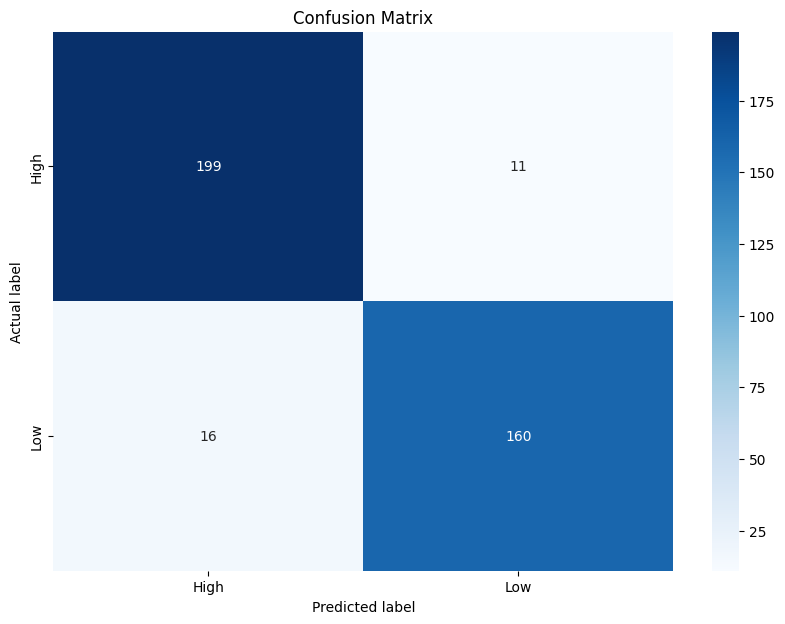

In [ ]:
# Visualize the Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for labeling purposes
cm_df = pd.DataFrame(conf_matrix,
                     index = ['High', 'Low'],
                     columns = ['High', 'Low'])

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [98]:
from sklearn.feature_selection import SelectKBest, f_classif

# Calculate feature importance using ANOVA F-test
feature_selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Get the indices of selected features
selected_feature_indices = feature_selector.get_support()

# Get the names of the selected features
selected_features = predictors.columns[selected_feature_indices]

# Train the KNN model with selected features
knn.fit(X_train_selected, y_train)
y_pred_selected = knn.predict(X_test)
selected_feature_accuracy = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy with Selected Features: {selected_feature_accuracy}")
print(f"Selected Features: {selected_features}")

len(selected_features)

Accuracy with Selected Features: 0.9222797927461139
Selected Features: Index(['CountyFIPS_Final', '% below 18 years of age raw value',
       'Diabetes prevalence raw value', 'Unemployment raw value',
       '% rural raw value', 'Adult obesity raw value',
       'Adult smoking raw value', 'Median household income raw value',
       'Physical inactivity raw value', 'Population raw value',
       'Uninsured raw value', 'Cat_Income_50-60k', 'Cat_Income_<50k',
       'Cat_Income_>60k', 'Cat_pop_Large', 'Cat_pop_Small',
       'Cat_pop_Small-Medium', 'Cat_pop_V Large'],
      dtype='object')


18